<a id='toc'></a>

# Table of content
Dataset: <br>
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

[Conclusions](#conclusions)

- [Libraries](#libraries)
- [Exploration analysis](#exploration_analysis)

<a id='conclusions'></a>

# Conclusions

**`1.`** xxx

**`2.`** xxx

**`3.`** xxx

<a id='libraries'></a>

# Libraries

In [322]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [323]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # metoda częstościowa
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler, StandardScaler, MaxAbsScaler, QuantileTransformer
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from time import time

random_state=2023

<a id='Exploratory_analysis'></a>

# Exploratory analysis

In [324]:
# import danych i podgląd
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [325]:
# number of duplicates
len(df)-len(df.drop_duplicates())

240

In [326]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [327]:
# wydruk nazw kolumn
for i in df.columns:
    print(i)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [328]:
dict_colums_names = {
                    "fixed acidity": "kwasowość_stała",
                    "volatile acidity": "kwasowość_lotna",
                    "citric acid": "kwas_cytrynowy",
                    "residual sugar": "cukier_resztkowy",
                    "chlorides": "chlorki",
                    "free sulfur dioxide": "wolny_dwutlenek_siarki",
                    "total sulfur dioxide": "całkowity_dwutlenek_siarki",
                    "density": "gęstość",
                    "pH": "pH",
                    "sulphates": "siarczany",
                    "alcohol": "alkohol",
                    "quality": "jakość",    
                    }

In [329]:
df.rename(columns=dict_colums_names, inplace=True)
df


,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [330]:
# sprawdzenie czy mamy NaN
df.isna().sum()

kwasowość_stała               0
kwasowość_lotna               0
kwas_cytrynowy                0
cukier_resztkowy              0
chlorki                       0
wolny_dwutlenek_siarki        0
całkowity_dwutlenek_siarki    0
gęstość                       0
pH                            0
siarczany                     0
alkohol                       0
jakość                        0
dtype: int64

In [331]:
# sprawdzenie czy mamy nulle
df.isnull().sum()

kwasowość_stała               0
kwasowość_lotna               0
kwas_cytrynowy                0
cukier_resztkowy              0
chlorki                       0
wolny_dwutlenek_siarki        0
całkowity_dwutlenek_siarki    0
gęstość                       0
pH                            0
siarczany                     0
alkohol                       0
jakość                        0
dtype: int64

In [332]:
# sprawdzenie typu kolumn
df.dtypes

kwasowość_stała               float64
kwasowość_lotna               float64
kwas_cytrynowy                float64
cukier_resztkowy              float64
chlorki                       float64
wolny_dwutlenek_siarki        float64
całkowity_dwutlenek_siarki    float64
gęstość                       float64
pH                            float64
siarczany                     float64
alkohol                       float64
jakość                          int64
dtype: object

In [333]:
# sprawdzenie statystyk
df.describe().apply(lambda x: round(x, 2))

,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
count,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62
std,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.16,0.17,1.08,0.82
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   kwasowość_stała             1359 non-null   float64
 1   kwasowość_lotna             1359 non-null   float64
 2   kwas_cytrynowy              1359 non-null   float64
 3   cukier_resztkowy            1359 non-null   float64
 4   chlorki                     1359 non-null   float64
 5   wolny_dwutlenek_siarki      1359 non-null   float64
 6   całkowity_dwutlenek_siarki  1359 non-null   float64
 7   gęstość                     1359 non-null   float64
 8   pH                          1359 non-null   float64
 9   siarczany                   1359 non-null   float64
 10  alkohol                     1359 non-null   float64
 11  jakość                      1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


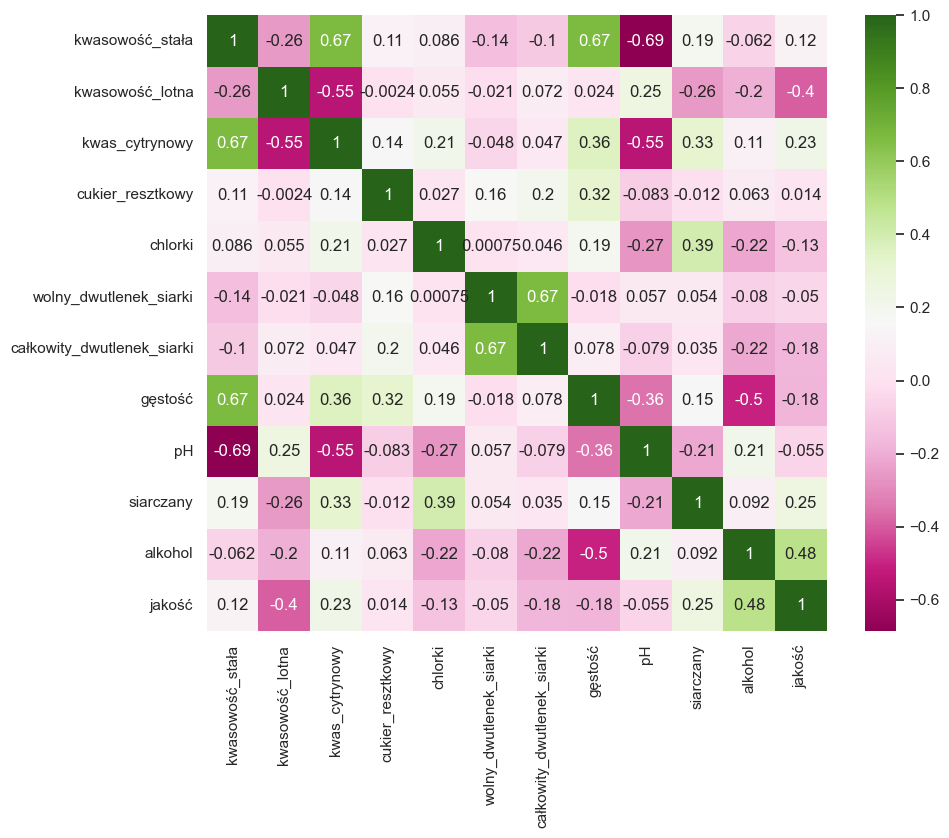

In [335]:
# sprawdzenie korelacji
figure = plt.figure(figsize = (10, 8), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

# najwieksza pozytywna korelacje na jakosc wina ma alkohol
# najwieksza negatywna korelacje na jakosci wina ma kwasowosc lotna

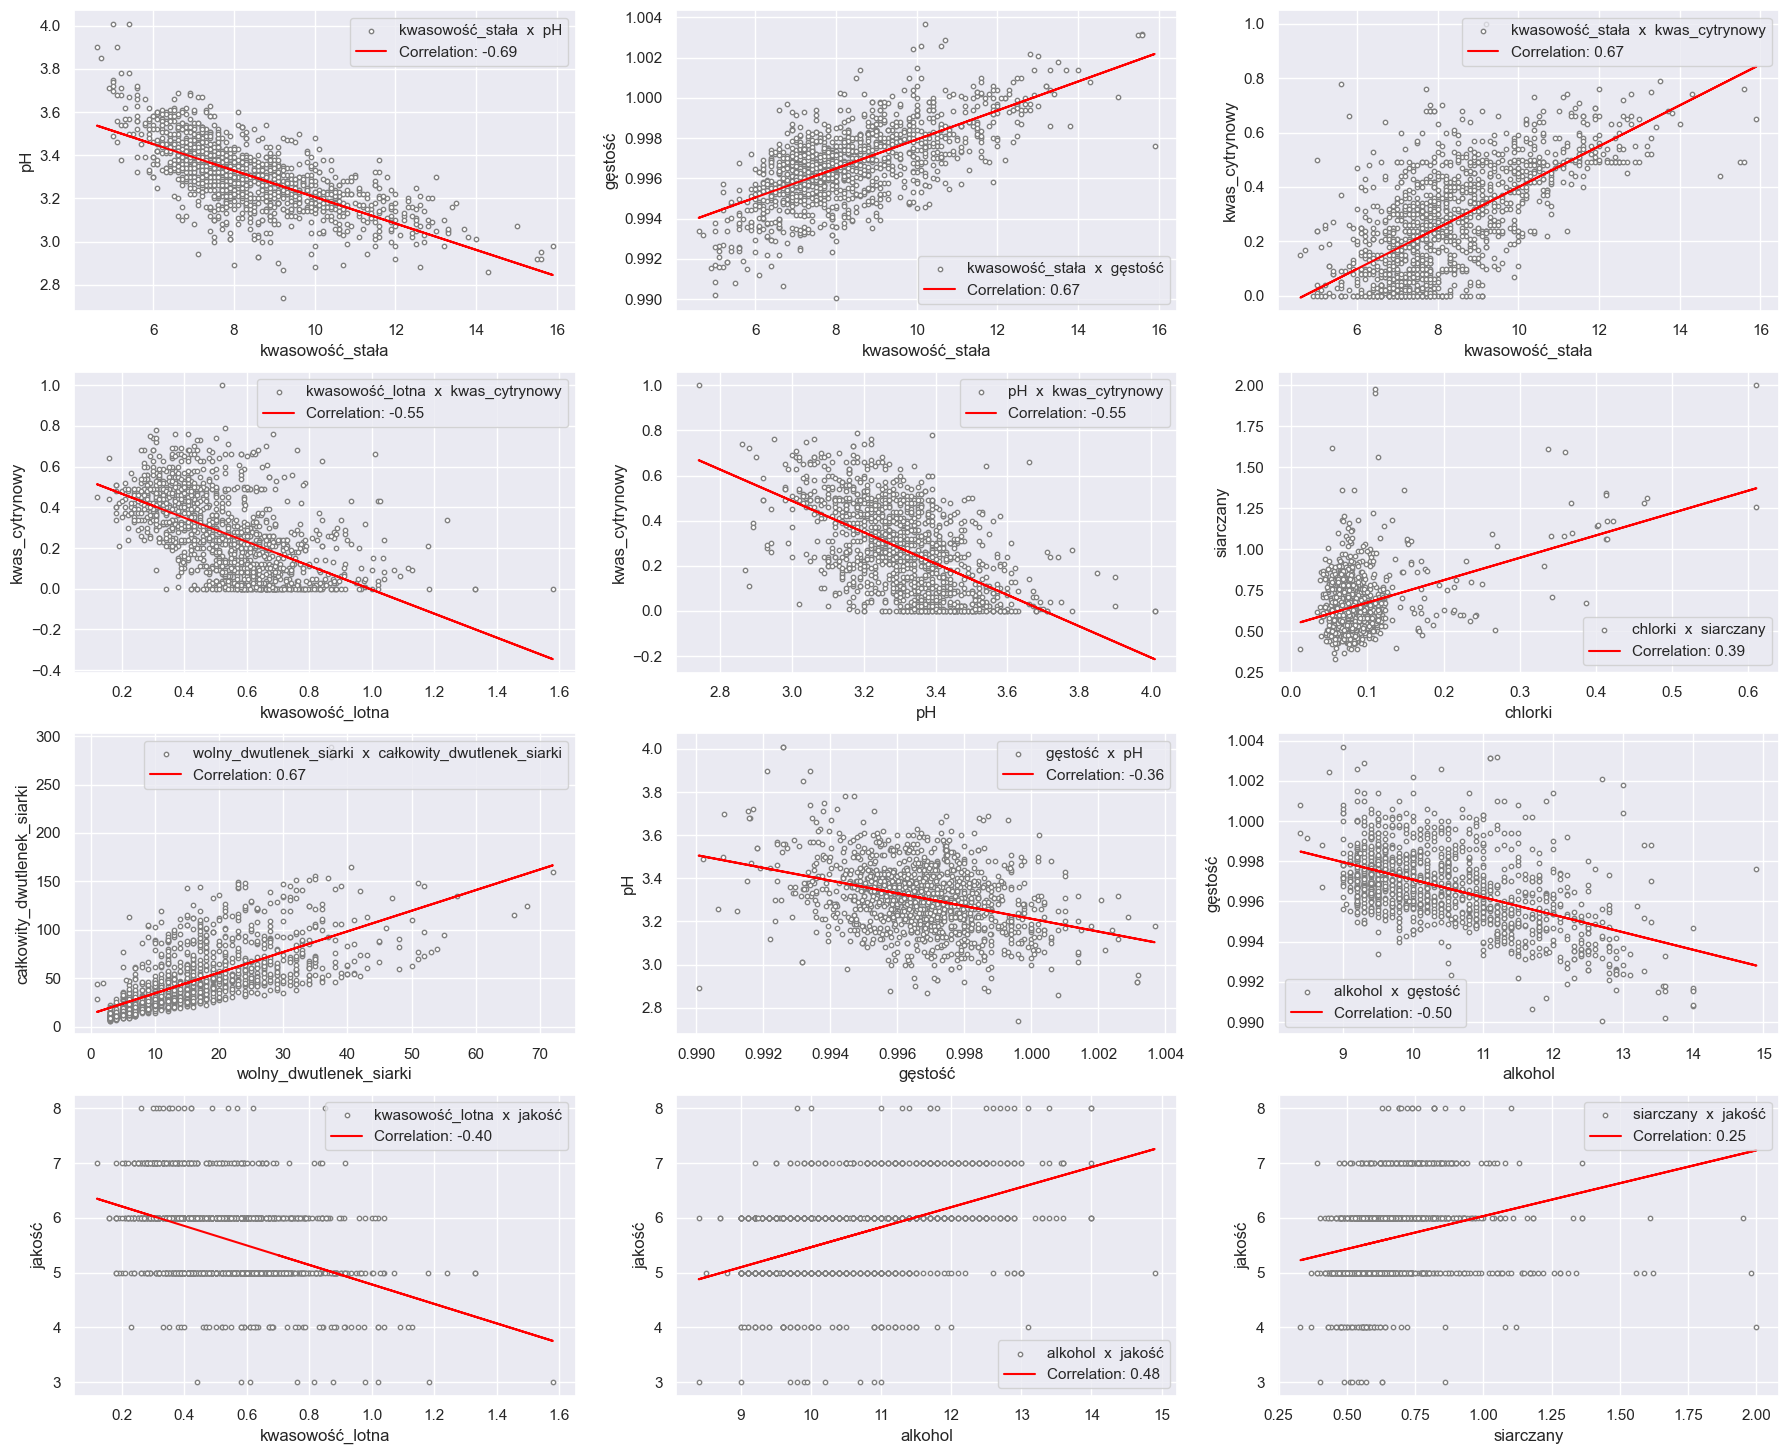

In [336]:
# narysowanie pary wykresów z największą korelacją
data = [
        (df["kwasowość_stała"], df["pH"], 'kwasowość_stała  x  pH'),
        (df["kwasowość_stała"], df["gęstość"], 'kwasowość_stała  x  gęstość'),
        (df["kwasowość_stała"], df["kwas_cytrynowy"], 'kwasowość_stała  x  kwas_cytrynowy'),
        
        (df["kwasowość_lotna"], df["kwas_cytrynowy"], 'kwasowość_lotna  x  kwas_cytrynowy'),
        (df["pH"], df["kwas_cytrynowy"], 'pH  x  kwas_cytrynowy'),
        (df["chlorki"], df["siarczany"], 'chlorki  x  siarczany'),
        
        (df["wolny_dwutlenek_siarki"], df["całkowity_dwutlenek_siarki"], 'wolny_dwutlenek_siarki  x  całkowity_dwutlenek_siarki'),
        (df["gęstość"], df["pH"], 'gęstość  x  pH'),
        (df["alkohol"], df["gęstość"], 'alkohol  x  gęstość'),
        
        (df["kwasowość_lotna"], df["jakość"], 'kwasowość_lotna  x  jakość'),
        (df["alkohol"], df["jakość"], 'alkohol  x  jakość'),
        (df["siarczany"], df["jakość"], 'siarczany  x  jakość'),
        ]


fig, ((ax1, ax2, ax3),
      (ax4, ax5, ax6),
      (ax7, ax8, ax9),
      (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize = (22, 18), dpi=100)

for ax, (x, y, label) in zip((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12), data):
    ax.scatter(x, y, label=label, c='white', edgecolors="grey", s=10)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color='red', label='Correlation: {:.2f}'.format(np.corrcoef(x, y)[0, 1]))
    ax.legend()

plt.show()



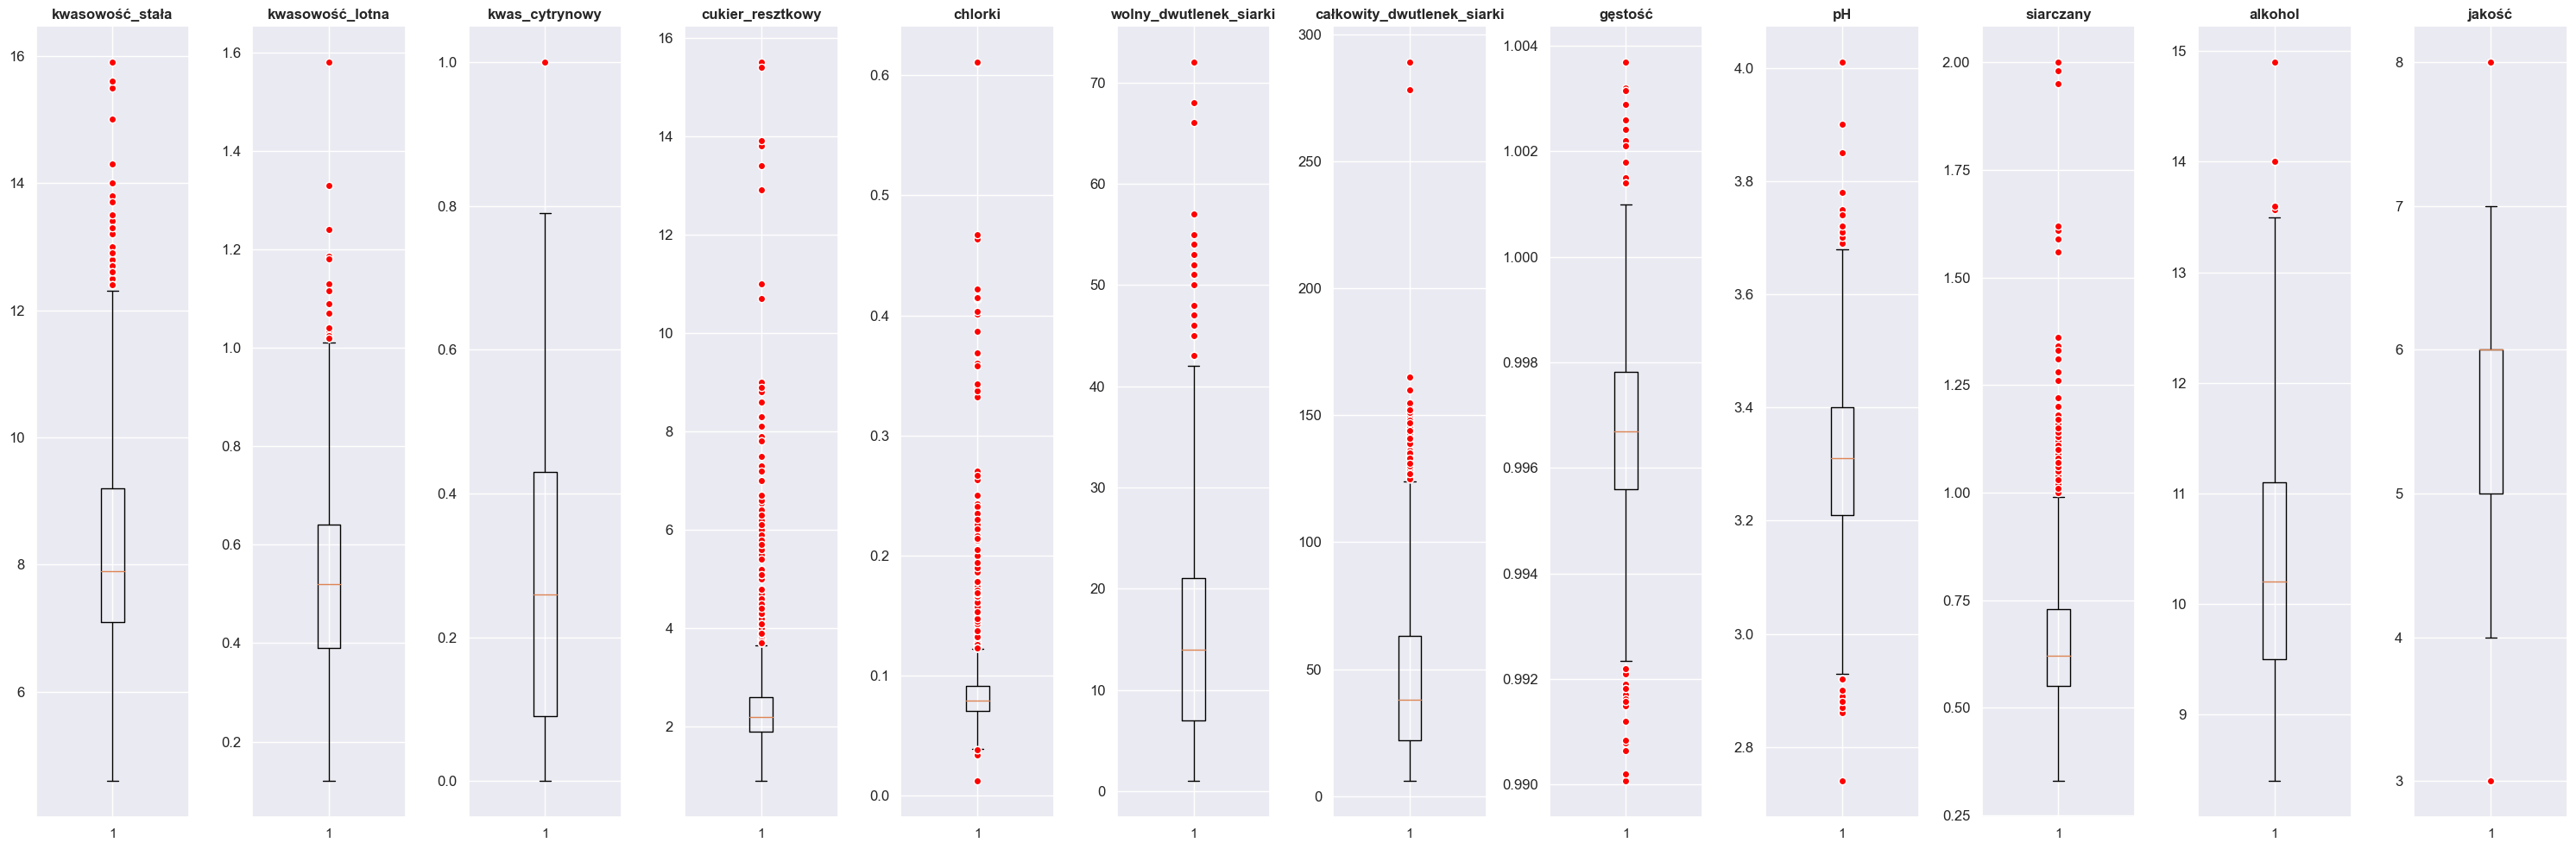

In [337]:
#box plot dla kazdej kolumny 
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(30,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

In [338]:
for i in df.columns:
    nbins = 80
    fig = px.histogram(df, x=i,
                    marginal="box",
                    width=800, height=500,
                    title=i,
                    color_discrete_sequence=['#FF6692'],
                    nbins = nbins)


    fig.update_layout(
        font_family="Ubuntu",
        font_color="black",
        title_font_family="Ubuntu",
        title_font_color="black",
        title_font_size=25,
        yaxis_title_text="Ilość",
        xaxis_title_text=i
    )

    fig.show()

In [339]:
# powyższe wykresy nie wyswietlaja sie na repozytorium

<a id='wnioski_po_eksploracji_danych'></a>

<span style="color:grey">

### Wnioski po eksploracji danych
- wydaje się, że całkowity dwutlenek siarki zachowuje się bardzo podobnie jak wolny dwutlenek siarki i ze mozna zrezygnowac z jednej z tych cech
- inne cechy, które być może warto wykluczyć ze względu na niskie zróżnicowanie zmiennej lub koncentrację wokół mody:
    - chlorki
    - cukier resztowy
    - gęstość
- najwiekszy wplyw na jakosc wina ma poziom alkoholu. wysoki poziom alkoholu oznacza, ze winogrono bylo dobrze naslonecznione i zawiralo duzo cukru
- pozytywny wplyw poza alkoholem, na jakosc wina maja:
    - siarczany
    - kwas cytrynowy
- negatywny wplyw na jakosc wina kwasowosc lotna
- może mieć sens podzielenie targetu:
    - poniżej progu kontroli jakości: 0-4
    - wina standardowe: 5-6
    - wina wysokiej jakości: 7-10
- accuracy na poziomie 68% nie jest miar
<span>


<a id='Metric_and_validation'></a>

# Metric and validation

### Metric

Dataset is highly unbalanced - it cointains relatively small amount of bad and great wines compared to average. The most suitable metric would be `F-beta score`. It is derivative of F-score measure. If we set **beta** parameter equal to 2.0 it means that recall is more important than precision. It is important to mark especially bad and great quality wines, becasue:
- bad quality wines could ruin brand reputation on the market
- great quality wines allow to achieve higher margins on sales

### Validation

Data distribution is unbalanced - Stratified K Fold can be useful, because it allows to maintain the same proportion of samples

<a id='basic_model'></a>

# Basic model

In [340]:
# quality distribution
df.groupby("jakość")["jakość"].count()

jakość
3     10
4     53
5    577
6    535
7    167
8     17
Name: jakość, dtype: int64

In [341]:
df

,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [342]:
# change outcome classes
df.loc[df['jakość'] <= 4, 'jakość'] = 1
df.loc[df['jakość'] == 5, 'jakość'] = 2
df.loc[df['jakość'] == 6, 'jakość'] = 3
df.loc[df['jakość'] >= 7, 'jakość'] = 4

In [343]:
df.groupby("jakość")["jakość"].count()

jakość
1      63
2    1112
3     184
Name: jakość, dtype: int64

In [344]:
# train/validation $ test split, including stratify parameter to keep proportions
X = df.iloc[:, :-1]
y = df.iloc[:, -1:].to_numpy().ravel()
test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    random_state=random_state,
                                                    stratify=df["jakość"])

In [345]:
# micro average takes into account the overall performance of the classifier
# micro sums up all TP, TN, FP and FN and secondly calculates metrics
# in micro class with the biggest representation has the most impact

# macro average gives equal weight to each class and calculates the average of individual scores
# macro calculates metric first and then calculate average of them 
# in macro all class whas the same impact, regardless representation

def run_model(model, X, y, cross_val):
    """
    function that train model
    input:
            model: estimator (e.g. random forest, XGBoost)
            X: training set
            y: target set
            cross_val: kind of validation
    output/print:
            average results from every fold, incuding:
                fbeta,
                f1,
                recall,
                precision
            cross_val_time: total time
    """

    model_name = type(model).__name__

    start = time()
    
    fbeta_scorer = make_scorer(fbeta_score, beta=2, average='macro')
    recall_scorer = make_scorer(recall_score, average='macro')
    precision_scorer = make_scorer(precision_score, average='macro')
    f1_scorer = make_scorer(f1_score, average='macro')
    
    fbeta = cross_val_score(model, X, y, cv=cross_val, scoring=fbeta_scorer)
    recall = cross_val_score(model, X, y, cv=cross_val, scoring=recall_scorer)
    precision = cross_val_score(model, X, y, cv=cross_val, scoring=precision_scorer)  
    f1 = cross_val_score(model, X, y, cv=cross_val, scoring=f1_scorer)  

    end = time()
    cross_val_time = end-start
    
    print(f"{model_name} || fbeta: {np.mean(fbeta):.2f}, f1: {np.mean(f1):.2f}, recall: {np.mean(recall):.2f}, precision: {np.mean(precision):.2f}, time: {round(cross_val_time, 2)}") 

In [346]:
# function that show features important on the chart
def plot_feature_importances(model, features_list, ax):
    model_name = type(model).__name__
    skplt.estimators.plot_feature_importances(model,
                                              feature_names=df[features_list].columns,
                                              title=f'{model_name} - feature importances',
                                              ax=ax)
    plt.xticks(rotation=90)

In [347]:
# defining folds and models
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

DT_model = DecisionTreeClassifier(random_state=random_state)
RF_model = RandomForestClassifier(random_state=random_state)
XGB_model = XGBClassifier(random_state=random_state, eval_metric='mlogloss')
KNN_model = KNeighborsClassifier()

models = [DT_model, RF_model, XGB_model, KNN_model]

In [348]:
# quick evaluation on training set
for model in models:
    run_model(model, X_train, y_train, skf)

DecisionTreeClassifier || fbeta: 0.48, f1: 0.48, recall: 0.49, precision: 0.47, time: 0.12
RandomForestClassifier || fbeta: 0.45, f1: 0.46, recall: 0.44, precision: 0.57, time: 2.61
XGBClassifier || fbeta: 0.45, f1: 0.46, recall: 0.45, precision: 0.49, time: 3.83
KNeighborsClassifier || fbeta: 0.39, f1: 0.40, recall: 0.39, precision: 0.55, time: 0.2


DecisionTreeClassifier
fbeta score = 0.52
              precision    recall  f1-score   support

           1       0.20      0.19      0.20        21
           2       0.89      0.86      0.87       371
           3       0.45      0.54      0.49        61

    accuracy                           0.78       453
   macro avg       0.51      0.53      0.52       453
weighted avg       0.79      0.78      0.79       453

RandomForestClassifier
fbeta score = 0.42
              precision    recall  f1-score   support

           1       1.00      0.05      0.09        21
           2       0.84      0.96      0.90       371
           3       0.54      0.25      0.34        61

    accuracy                           0.83       453
   macro avg       0.79      0.42      0.44       453
weighted avg       0.81      0.83      0.79       453

XGBClassifier
fbeta score = 0.47
              precision    recall  f1-score   support

           1       0.20      0.05      0.08        21
           2

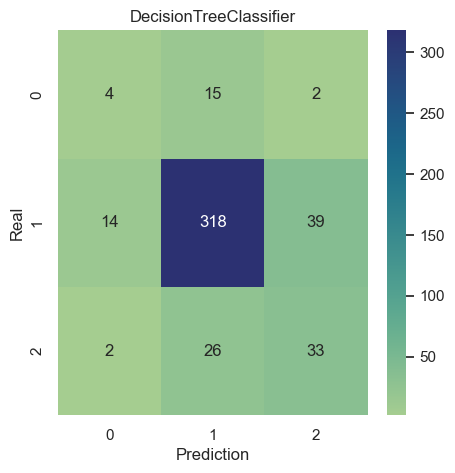

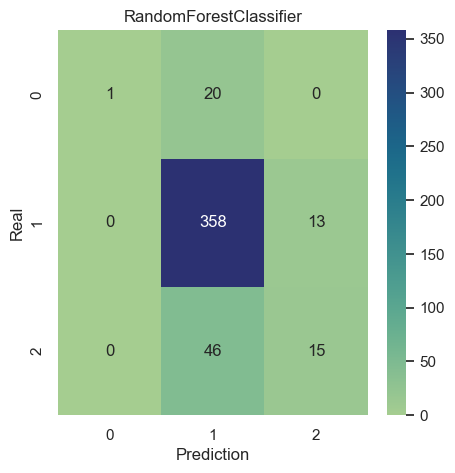

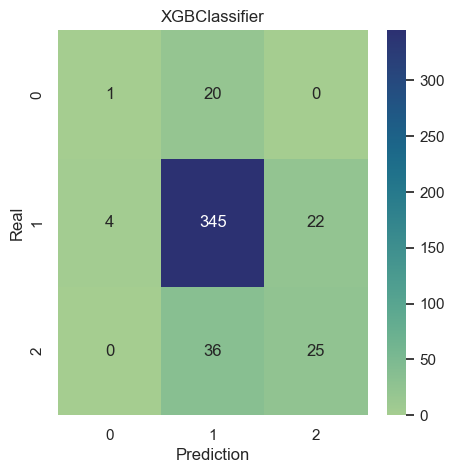

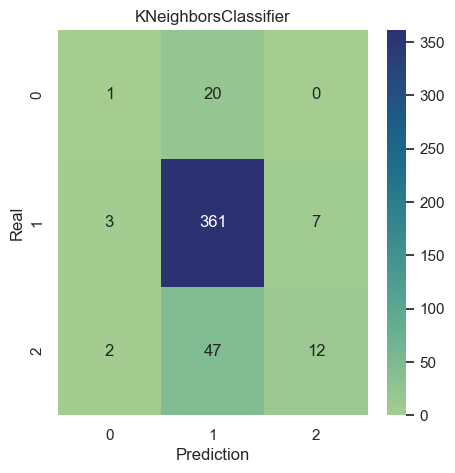

In [349]:
# test results
for model in models:
    print(type(model).__name__)
    model.fit(X_train, y_train)
    print(f"fbeta score = {fbeta_score(y_test, model.predict(X_test), beta=2, average='macro'):.2f}")
    print(classification_report(y_test, model.predict(X_test)))
    
    fig = plt.figure(figsize=(5,5))
    cm = confusion_matrix(y_test, model.predict(X_test))
    ax= plt.subplot()
    sns.set(font_scale=1)
    sns.heatmap(cm,
                annot=True,
                fmt='g',
                ax=ax,
                cmap="crest")


    ax.set_xlabel('Prediction')
    ax.set_ylabel('Real')
    ax.set_title(f"{type(model).__name__}")
    pass

In [350]:
# saving result of best estimator
fbeta_DT = fbeta_score(y_test, DT_model.predict(X_test), beta=2, average='macro')
fbeta_XGB = fbeta_score(y_test, XGB_model.predict(X_test), beta=2, average='macro')
print(f"fbeta_DT: {fbeta_DT:.2f}, fbeta_XGB: {fbeta_XGB:.2f}")

fbeta_DT: 0.52, fbeta_XGB: 0.47


<Figure size 5000x500 with 0 Axes>

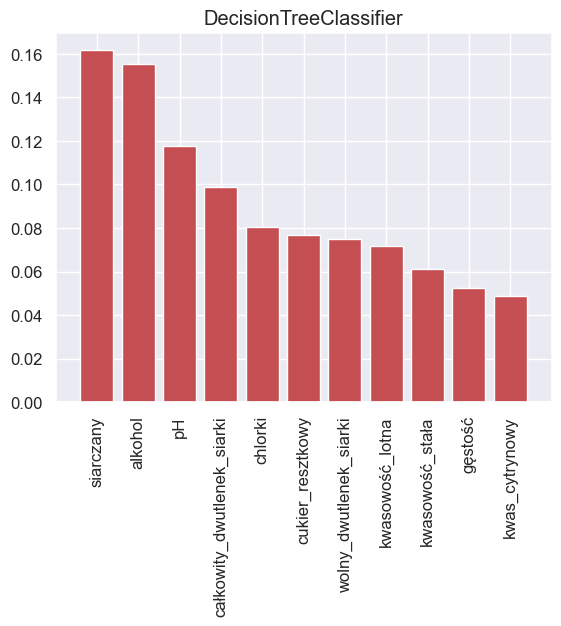

<Figure size 5000x500 with 0 Axes>

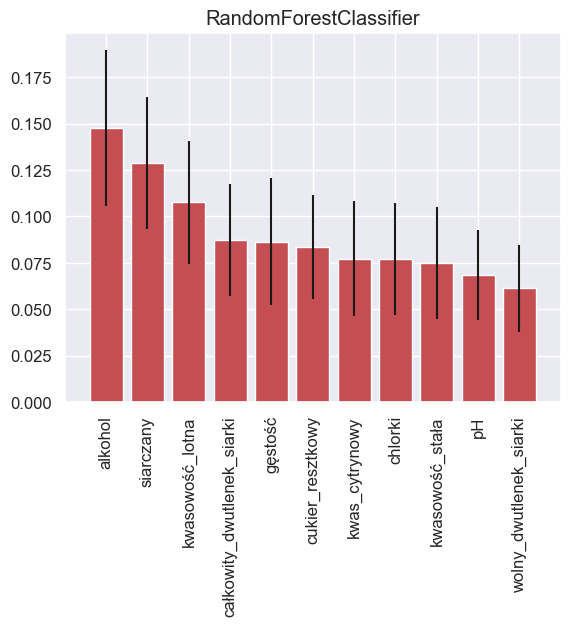

<Figure size 5000x500 with 0 Axes>

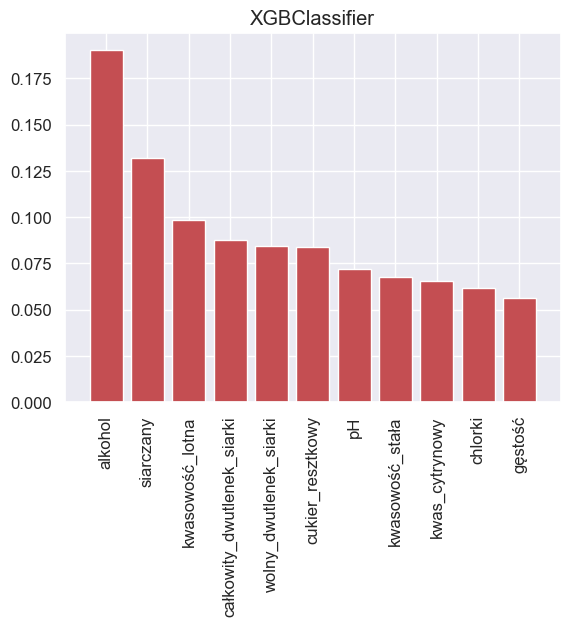

In [351]:
# feature importance for models based on trees
for model in models[:3]:
    figure = plt.figure(figsize=(50,5))
    skplt.estimators.plot_feature_importances(model, feature_names=X.columns, title=type(model).__name__)
    plt.xticks(rotation=90);

<a id='Feature_engineering'></a>

# Feature engineering

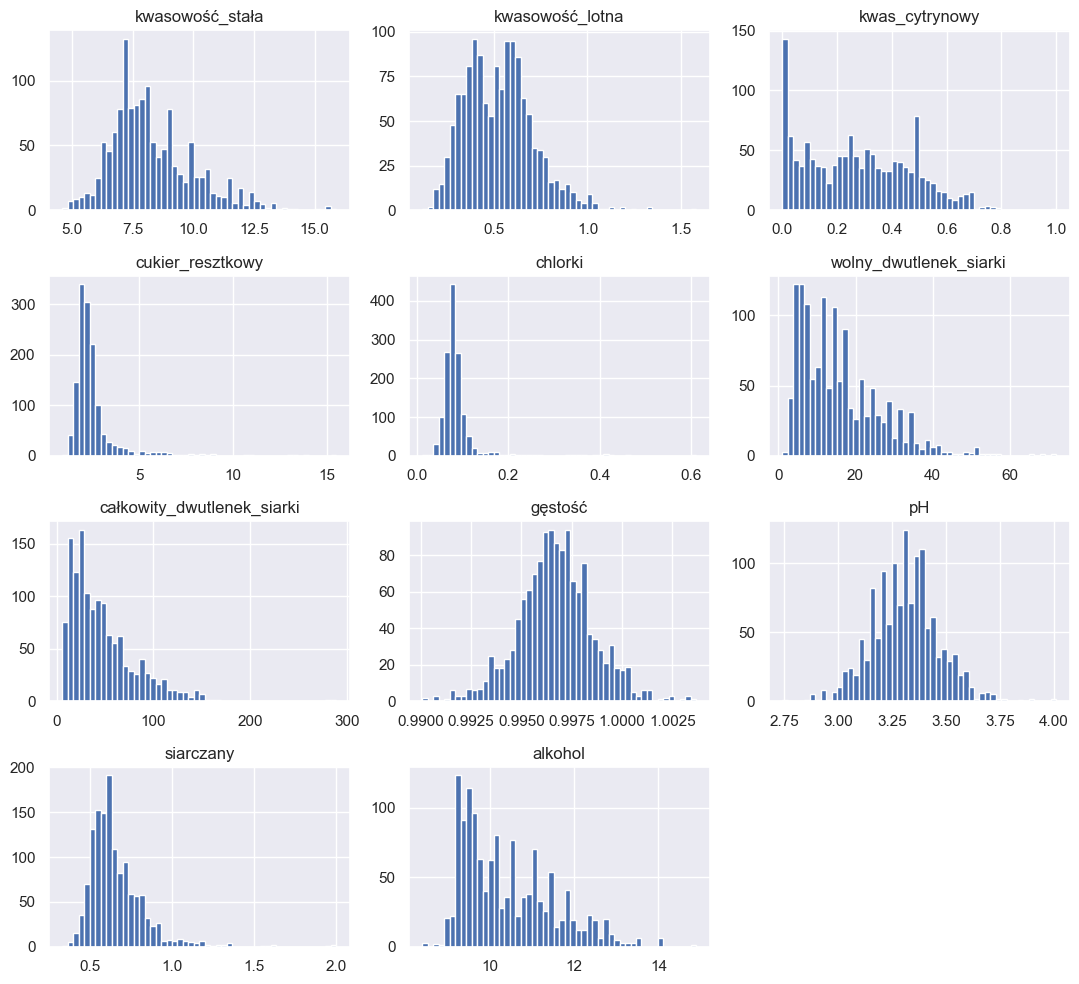

In [352]:
# histograms of features
df.iloc[:, :-1].hist(bins=50, figsize=(11,10))
plt.tight_layout();

In [353]:
# initializing scalers
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
maxabs_scaler = MaxAbsScaler()

scalers_list = [robust_scaler, standard_scaler, maxabs_scaler]

RobustScaler()
StandardScaler()
MaxAbsScaler()


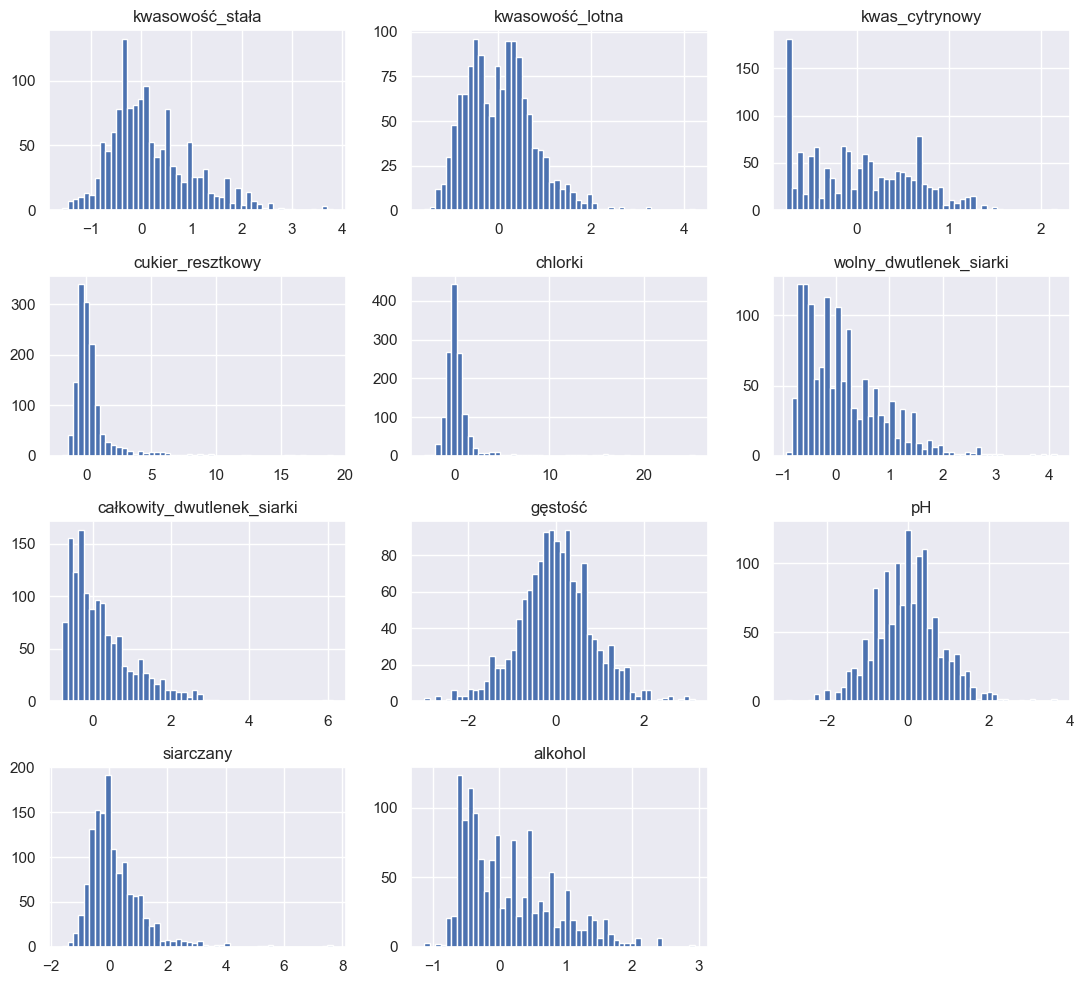

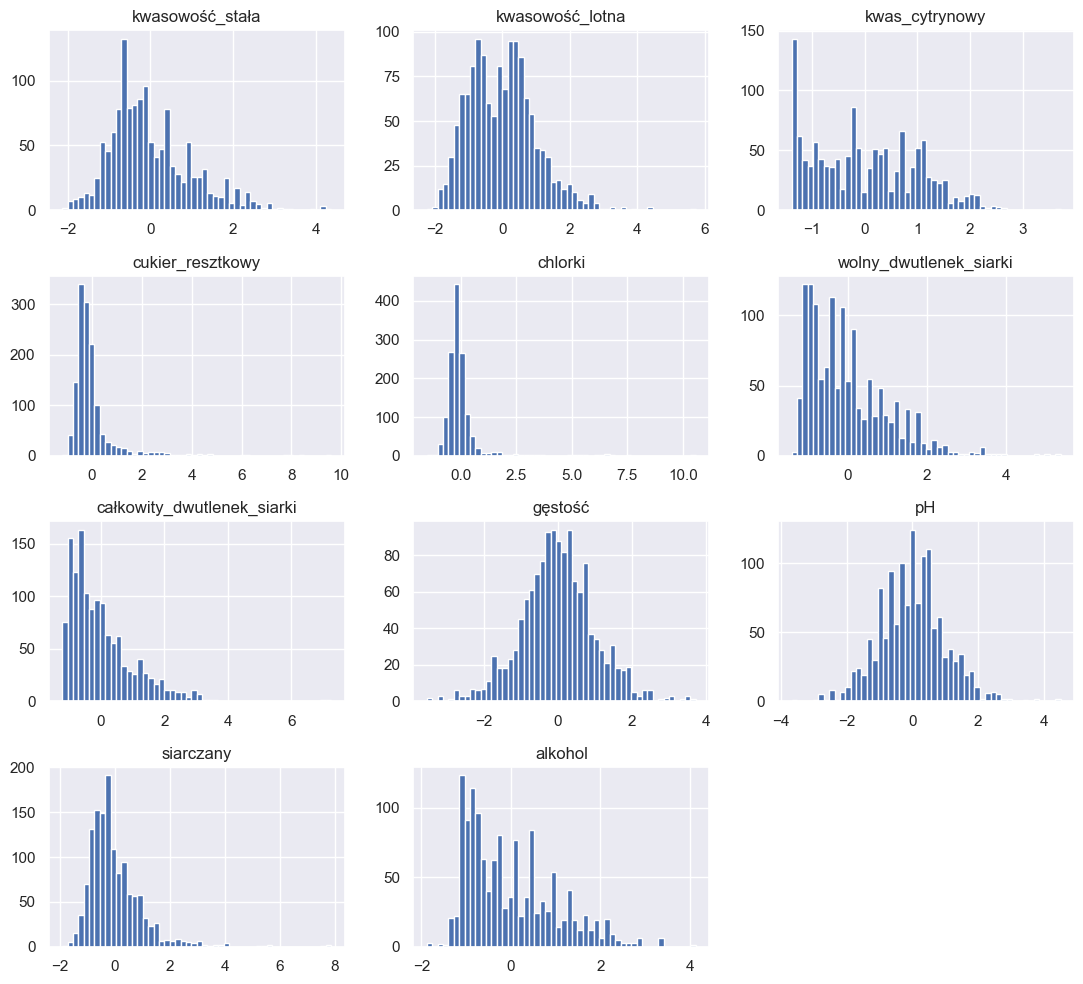

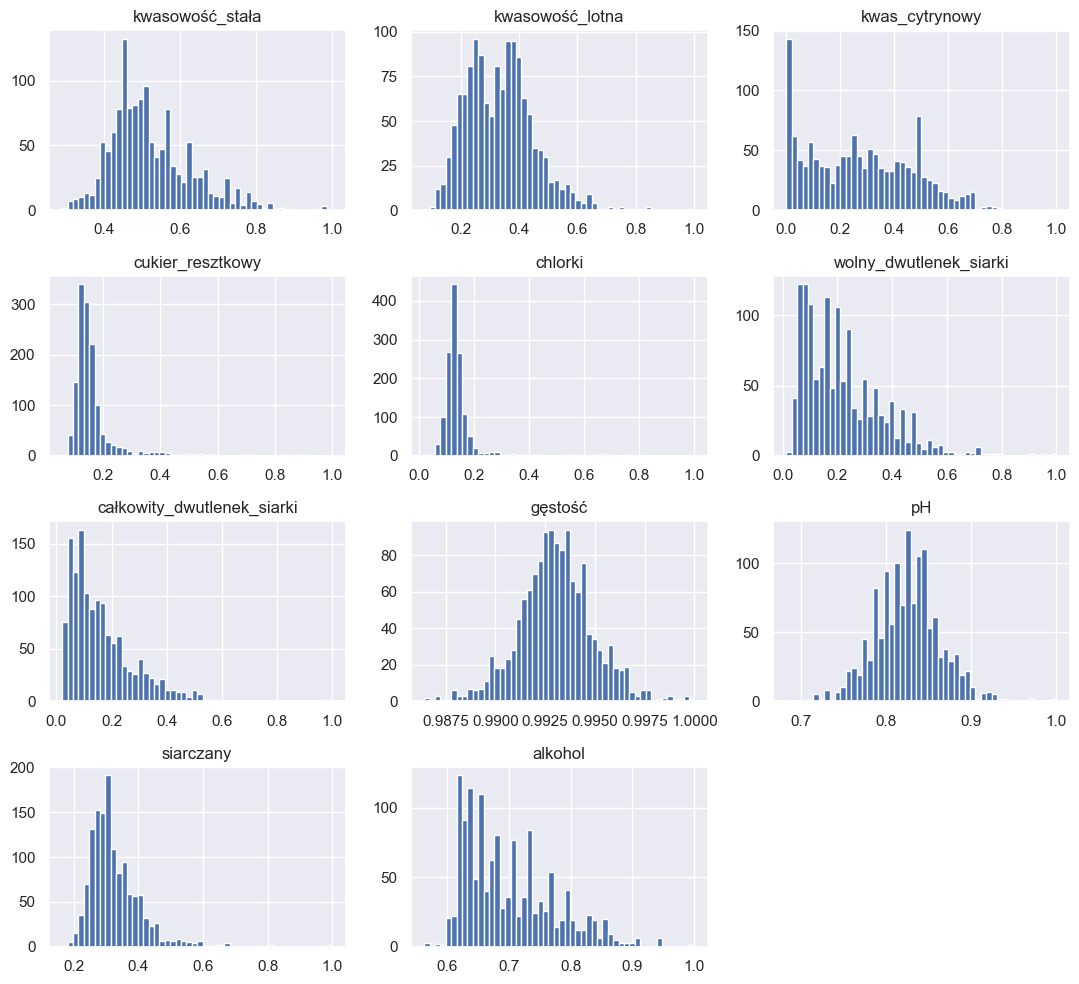

In [354]:
# visualization histogram after scalling
for scaler in scalers_list:
    df_features_copy = df.iloc[:, :-1].copy()
    df_scaled = scaler.fit_transform(df_features_copy)
    df_scaled = pd.DataFrame(df_scaled, columns=df_features_copy.columns)
    df_scaled.hist(bins=50, figsize=(11,10))
    print(f"{scaler}")
    plt.tight_layout();

There is no need for scalling the data in decision tree model. Data after scalling looks very similar what can be observed before scalling. Moreover decision tree can perform well without scalling

In [355]:
# check if scalling improve fbeta or f1 score
df_features_copy = df.iloc[:, :-1].copy()
df_scaled = standard_scaler.fit_transform(df_features_copy)
df_scaled = pd.DataFrame(df_scaled, columns=df_features_copy.columns)

X_scaled = df_scaled

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=test_size,
                                                    random_state=random_state,
                                                    stratify=df["jakość"])

In [356]:
# check if scalling improve fbeta or f1 score
for model in models:
    run_model(model, X_train_scaled, y_train, skf)

DecisionTreeClassifier || fbeta: 0.48, f1: 0.48, recall: 0.49, precision: 0.47, time: 0.12
RandomForestClassifier || fbeta: 0.44, f1: 0.45, recall: 0.44, precision: 0.49, time: 2.81
XGBClassifier || fbeta: 0.45, f1: 0.46, recall: 0.45, precision: 0.50, time: 4.8
KNeighborsClassifier || fbeta: 0.45, f1: 0.46, recall: 0.45, precision: 0.48, time: 0.28


Best model does not imporved due to scalling. KNeighbours imporoved, but Fbeta and f1 is still below level from Decision Tree Model

<a id='Optimalization'></a>

# Optimalization

In [357]:
# tuning the model
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)
fbeta_scorer = make_scorer(fbeta_score, beta=2, average='macro')

parameters_DT = {"class_weight": [None, {1:10, 2:1, 3:1, 4:10}, {1:20, 2:1, 3:1, 4:20}, "balanced"],
              "criterion": ["gini", "entropy"],
              "max_depth": np.arange(1, 15),
              "min_samples_split": np.arange(1, 5),
              "min_samples_leaf": np.arange(1, 5),
              "max_features": [None, "sqrt", "log2"],
              "splitter": ["best", "random"]}

grid_obj_DT = GridSearchCV(estimator=DT_model,
                           param_grid=parameters_DT,
                           scoring=fbeta_scorer,
                           cv=skf)

grid_fit_DT = grid_obj_DT.fit(X_train, y_train)

In [358]:
# get weight of each class for XGBoost classifier
class_1_proportion = len(y[y==1]) / len(y)
class_2_proportion = len(y[y==2]) / len(y)
class_3_proportion = len(y[y==3]) / len(y)
class_4_proportion = len(y[y==4]) / len(y)

print(class_1_proportion, class_2_proportion, class_3_proportion, class_4_proportion)

class_1_weight = class_1_proportion / class_1_proportion
class_2_weight = class_1_proportion / class_2_proportion
class_3_weight = class_1_proportion / class_3_proportion
class_4_weight = class_1_proportion / class_4_proportion

print(class_1_weight, class_2_weight, class_3_weight, class_4_weight)

weights_dictionary = {1: class_1_weight, 2: class_2_weight, 3: class_3_weight, 4: class_4_weight}
y_train_weights = [weights_dictionary[value] for value in y_train]

0.046357615894039736 0.8182487122884474 0.13539367181751288
1.0 0.05665467625899281 0.34239130434782605


In [359]:
# check if weights are properly assigned
y_and_weights = pd.DataFrame({'y': y_train, 'y_weights': y_train_weights})
y_and_weights.sample(10)

,y,y_weights
60,2,0.056655
644,2,0.056655
95,2,0.056655
323,2,0.056655
123,2,0.056655
122,2,0.056655
318,2,0.056655
809,2,0.056655
66,2,0.056655
9,2,0.056655


In [360]:
# tuning the model - XGB classifier
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)
fbeta_scorer = make_scorer(fbeta_score, beta=2, average='macro')

parameters_XGB = {"max_depth": np.arange(2, 10),
                  'n_estimators': range(60, 220, 40),
                  'learning_rate': [0.1, 0.01, 0.05]}

grid_obj_XGB = GridSearchCV(estimator=XGB_model,
                        param_grid=parameters_XGB,
                        scoring=fbeta_scorer,
                        cv=skf)

grid_fit_XGB = grid_obj_XGB.fit(X_train, y_train, sample_weight=y_train_weights) # implementing weights for each class

In [361]:
# Get the estimator
best_clf_DT = grid_fit_DT.best_estimator_
best_clf_XGB = grid_fit_XGB.best_estimator_

y_pred_DT = best_clf_DT.predict(X_test)
y_pred_XGB = best_clf_XGB.predict(X_test)

In [362]:
# Metrics before and after tuning
print("Unoptimized DT Model: fbeta = {:.2f}".format(fbeta_DT))
print("Optimized DT Model: fbeta = {:.2f}".format(fbeta_score(y_test, y_pred_DT, beta = 2, average='macro')), end="\n\n")

print("Unoptimized XGBoost Model: fbeta = {:.2f}".format(fbeta_XGB))
print("Optimized XGBoost Model: fbeta = {:.2f}".format(fbeta_score(y_test, y_pred_XGB, beta = 2, average='macro')))

Unoptimized DT Model: fbeta = 0.52
Optimized DT Model: fbeta = 0.50

Unoptimized XGBoost Model: fbeta = 0.47
Optimized XGBoost Model: fbeta = 0.59


DT
fbeta score = 0.52

              precision    recall  f1-score   support

           1       0.20      0.19      0.20        21
           2       0.89      0.86      0.87       371
           3       0.45      0.54      0.49        61

    accuracy                           0.78       453
   macro avg       0.51      0.53      0.52       453
weighted avg       0.79      0.78      0.79       453



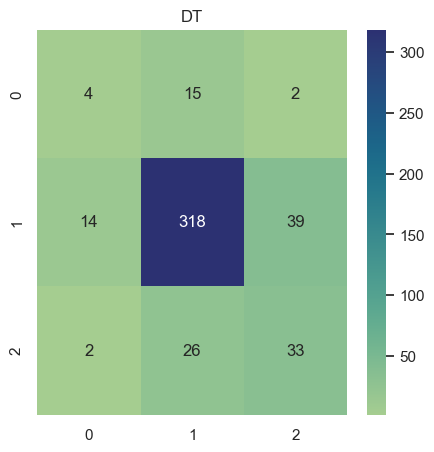

In [363]:
print("DT")
print(f"fbeta score = {fbeta_score(y_test, DT_model.predict(X_test), beta=2, average='macro'):.2f}", end="\n\n")
print(classification_report(y_test, DT_model.predict(X_test)))

fig = plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, DT_model.predict(X_test))
ax= plt.subplot()
sns.set(font_scale=1)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            ax=ax,
            cmap="crest")
plt.title("DT");

Best DT estimator after tuning
fbeta score = 0.50

              precision    recall  f1-score   support

           1       0.18      0.19      0.19        21
           2       0.88      0.81      0.84       371
           3       0.38      0.54      0.45        61

    accuracy                           0.75       453
   macro avg       0.48      0.52      0.49       453
weighted avg       0.78      0.75      0.76       453



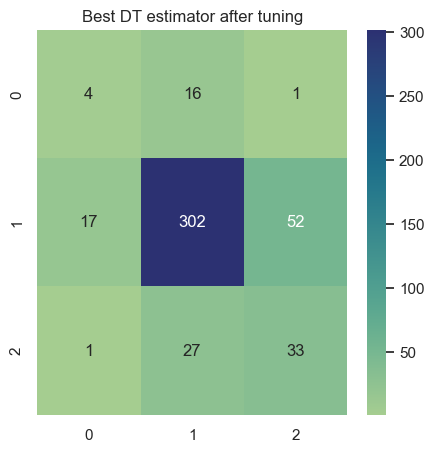

In [364]:
print("Best DT estimator after tuning")
print(f"fbeta score = {fbeta_score(y_test, best_clf_DT.predict(X_test), beta=2, average='macro'):.2f}", end="\n\n")
print(classification_report(y_test, best_clf_DT.predict(X_test)))

fig = plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, best_clf_DT.predict(X_test))
ax= plt.subplot()
sns.set(font_scale=1)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            ax=ax,
            cmap="crest")
plt.title("Best DT estimator after tuning");

XGB
fbeta score = 0.47

              precision    recall  f1-score   support

           1       0.20      0.05      0.08        21
           2       0.86      0.93      0.89       371
           3       0.53      0.41      0.46        61

    accuracy                           0.82       453
   macro avg       0.53      0.46      0.48       453
weighted avg       0.79      0.82      0.80       453



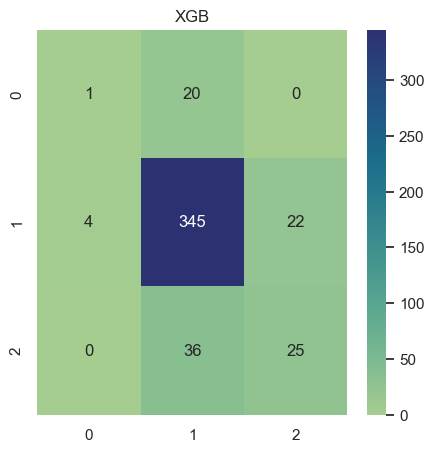

In [365]:
print("XGB")
print(f"fbeta score = {fbeta_score(y_test, XGB_model.predict(X_test), beta=2, average='macro'):.2f}", end="\n\n")
print(classification_report(y_test, XGB_model.predict(X_test)))

fig = plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, XGB_model.predict(X_test))
ax= plt.subplot()
sns.set(font_scale=1)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            ax=ax,
            cmap="crest")
plt.title("XGB");

Best XGB estimator after tuning
fbeta score = 0.59

              precision    recall  f1-score   support

           1       0.23      0.33      0.27        21
           2       0.93      0.76      0.84       371
           3       0.40      0.80      0.54        61

    accuracy                           0.74       453
   macro avg       0.52      0.63      0.55       453
weighted avg       0.83      0.74      0.77       453



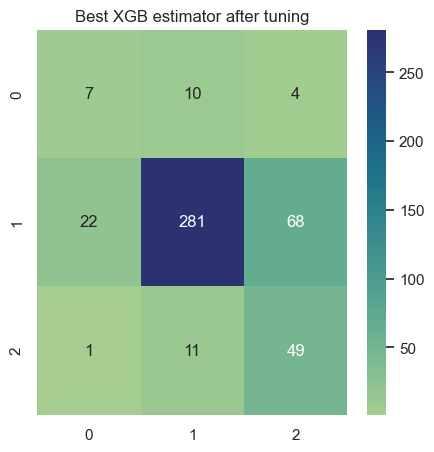

In [366]:
print("Best XGB estimator after tuning")
print(f"fbeta score = {fbeta_score(y_test, best_clf_XGB.predict(X_test), beta=2, average='macro'):.2f}", end="\n\n")
print(classification_report(y_test, best_clf_XGB.predict(X_test)))

fig = plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, best_clf_XGB.predict(X_test))
ax= plt.subplot()
sns.set(font_scale=1)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            ax=ax,
            cmap="crest")
plt.title("Best XGB estimator after tuning");

Turned out that even though Decision Tree basic model perfomerd better than basic XGBoost model, Decision Tree was resistant to class weights. XGBoost perfomerd better after implementhing sample_weight parameter, and fbeta score increased up to 0.59 compared to Decision Tree basic model 